In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
bac = pd.read_csv('BACs_column.csv')
bac = bac.iloc[:-1,:] #Remove M/F row in plots
bac = bac.iloc[:,1:] #Remove time
bac.dropna() #Drop NaNs in plots
print(bac)

      P1     P2     P3     P4     P5     P6     P7     P8     P9    P10  \
0  0.450  0.270  0.420  0.440  0.440  0.310  0.110  0.250  0.420  0.340   
1  0.440  0.330  0.420  0.430  0.450  0.390  0.140  0.260  0.430  0.260   
2  0.430  0.380  0.500  0.490  0.470  0.400  0.190  0.290  0.440  0.260   
3  0.450  0.400  0.540  0.450  0.490  0.430  0.210  0.320  0.450  0.360   

     P11    P12    P13    P14    P15    P16    P17    P18    P19    P20  
0  0.550  0.390  0.520  0.430  0.530  0.480  0.250  0.480  0.320  0.630  
1  0.530  0.370  0.470  0.470  0.480  0.460  0.280  0.380  0.310  0.470  
2  0.540  0.460  0.490  0.480  0.570  0.580  0.290  0.470  0.340  0.480  
3  0.500  0.480    NaN  0.480  0.560  0.540  0.380  0.520  0.400  0.490  


In [3]:
df = pd.read_csv('participant_weight_height.csv')
df.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
0,1.74,1.61,1.74,1.65,1.65,1.82,1.69,1.77,1.82,1.62,1.88,1.91,1.66,1.87,1.78,1.65,1.91,1.84,1.94,1.75
1,67.90,85.50,84.10,72.80,60.60,64.10,70.30,72.50,73.50,61.40,83.60,88.50,57.10,93.20,70.20,81.60,92.20,81.50,95.10,72.40


In [4]:
bac = bac.astype(dict.fromkeys(bac.columns[:],float))
means = bac.mean()
print(means)

P1     0.442500
P2     0.345000
P3     0.470000
P4     0.452500
P5     0.462500
P6     0.382500
P7     0.162500
P8     0.280000
P9     0.435000
P10    0.305000
P11    0.530000
P12    0.425000
P13    0.493333
P14    0.465000
P15    0.535000
P16    0.515000
P17    0.300000
P18    0.462500
P19    0.342500
P20    0.517500
dtype: float64


In [5]:
def find_bmi(height, weight):
    return (weight / pow(height, 2))

In [6]:
height = df.iloc[0,:]
weight = df.iloc[1,:]

In [7]:
bmis = []
for x in range(len(weight)):
    bmis.append(round(find_bmi(height[x], weight[x]),1))
print(bmis)

[22.4, 33.0, 27.8, 26.7, 22.3, 19.4, 24.6, 23.1, 22.2, 23.4, 23.7, 24.3, 20.7, 26.7, 22.2, 30.0, 25.3, 24.1, 25.3, 23.6]


In [28]:
participant = 18
print(bmis[participant-1])

24.1


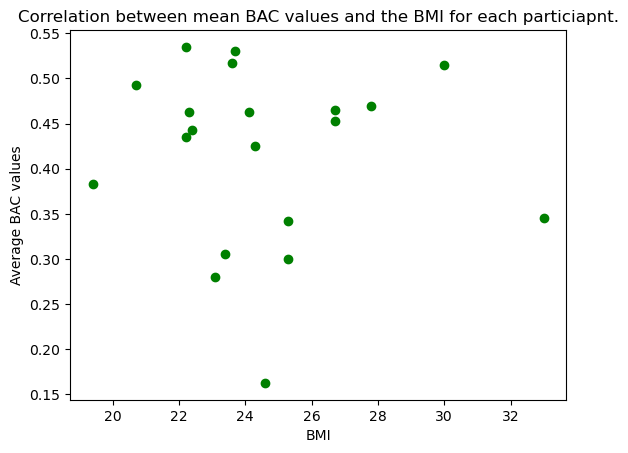

In [67]:
plt.scatter(bmis, means, color='green')
plt.title('Correlation between mean BAC values and the BMI for each particiapnt.')
plt.ylabel('Average BAC values')
plt.xlabel('BMI')
plt.savefig('bmi-mean.jpg')

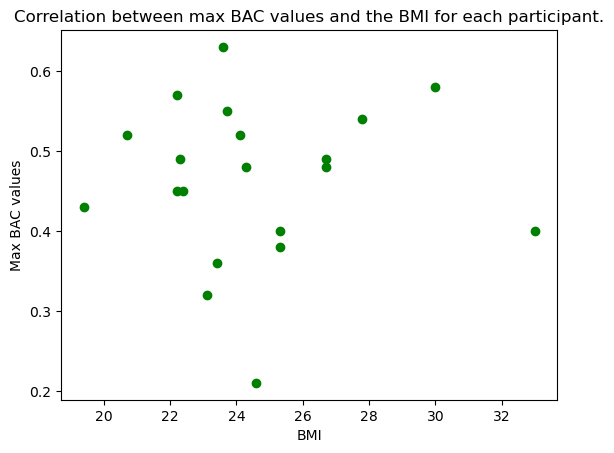

In [68]:
maxes = bac.max()
plt.scatter(bmis, maxes, color='green')
plt.title('Correlation between max BAC values and the BMI for each participant.')
plt.ylabel('Max BAC values')
plt.xlabel('BMI')
plt.savefig('bmi-max.jpg')

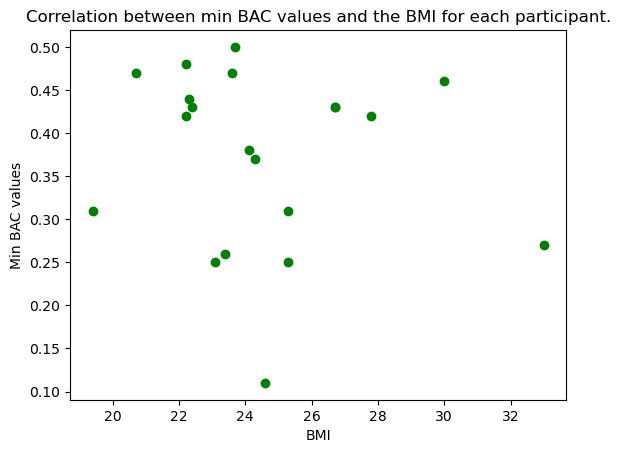

In [78]:
mins = bac.min()
plt.scatter(bmis, mins, color='green')
plt.title('Correlation between min BAC values and the BMI for each participant.')
plt.ylabel('Min BAC values')
plt.xlabel('BMI')
plt.savefig('bmi-min.jpg')

In [100]:
#Split males & females
# Set var = means, mins or maxes
var = round(means,4)
f_bacs = [var[0], var[1],var[2], var[3],var[4],var[6],var[9],var[12],var[14],var[15]]
m_bacs = [var[5],var[7],var[8],var[10],var[11],var[13],var[16],var[17],var[18],var[19]]
f_bmis = [bmis[0],bmis[1],bmis[2],bmis[3],bmis[4],bmis[6],bmis[9],bmis[12],bmis[14],bmis[15]]
m_bmis = [bmis[5],bmis[7],bmis[8],bmis[10],bmis[11],bmis[13],bmis[16],bmis[17],bmis[18],bmis[19]]

In [87]:
print(means)
print(f_bacs)
print(m_bacs)

P1     0.442500
P2     0.345000
P3     0.470000
P4     0.452500
P5     0.462500
P6     0.382500
P7     0.162500
P8     0.280000
P9     0.435000
P10    0.305000
P11    0.530000
P12    0.425000
P13    0.493333
P14    0.465000
P15    0.535000
P16    0.515000
P17    0.300000
P18    0.462500
P19    0.342500
P20    0.517500
dtype: float64
[0.4425, 0.345, 0.47, 0.4525, 0.4625, 0.1625, 0.305, 0.4933, 0.535, 0.515]
[0.3825, 0.28, 0.435, 0.53, 0.425, 0.465, 0.3, 0.4625, 0.3425, 0.5175]


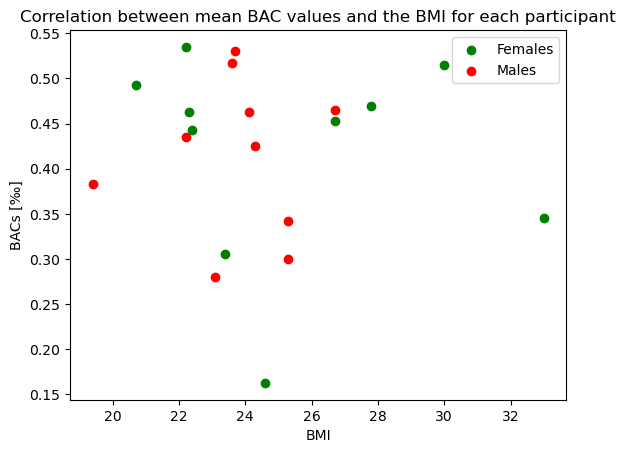

In [104]:
plt.scatter(f_bmis, f_bacs, color='green',label='Females')
plt.scatter(m_bmis, m_bacs, color='red',label='Males')
plt.title('Correlation between mean BAC values and the BMI for each participant')
plt.ylabel(u'BACs [‰]')
plt.xlabel('BMI')
plt.legend()
plt.savefig('mf_bmi_mean.jpg')